В этой тетрадке собраны baselines и условие задачи.

#Примеры рядов

Открываем файл с временными рядами

In [35]:
data_full_1_104 = pd.read_csv('data_full_1_104.csv')
data_full_1_104.irow(range(0,3))

,Unnamed: 0,ID,DiskSize,Creation,First,StartTime,Now,1,2,3,...,95,96,97,98,99,100,101,102,103,104
0,0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0.635799,104591,104670,104660,104764,0,0,0,...,0,0,0,0,0,0,0,0,0,134
1,1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,2.819260,104607,104676,104660,104764,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,1.370105,104607,104666,104660,104764,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Рисуем несколько рядов

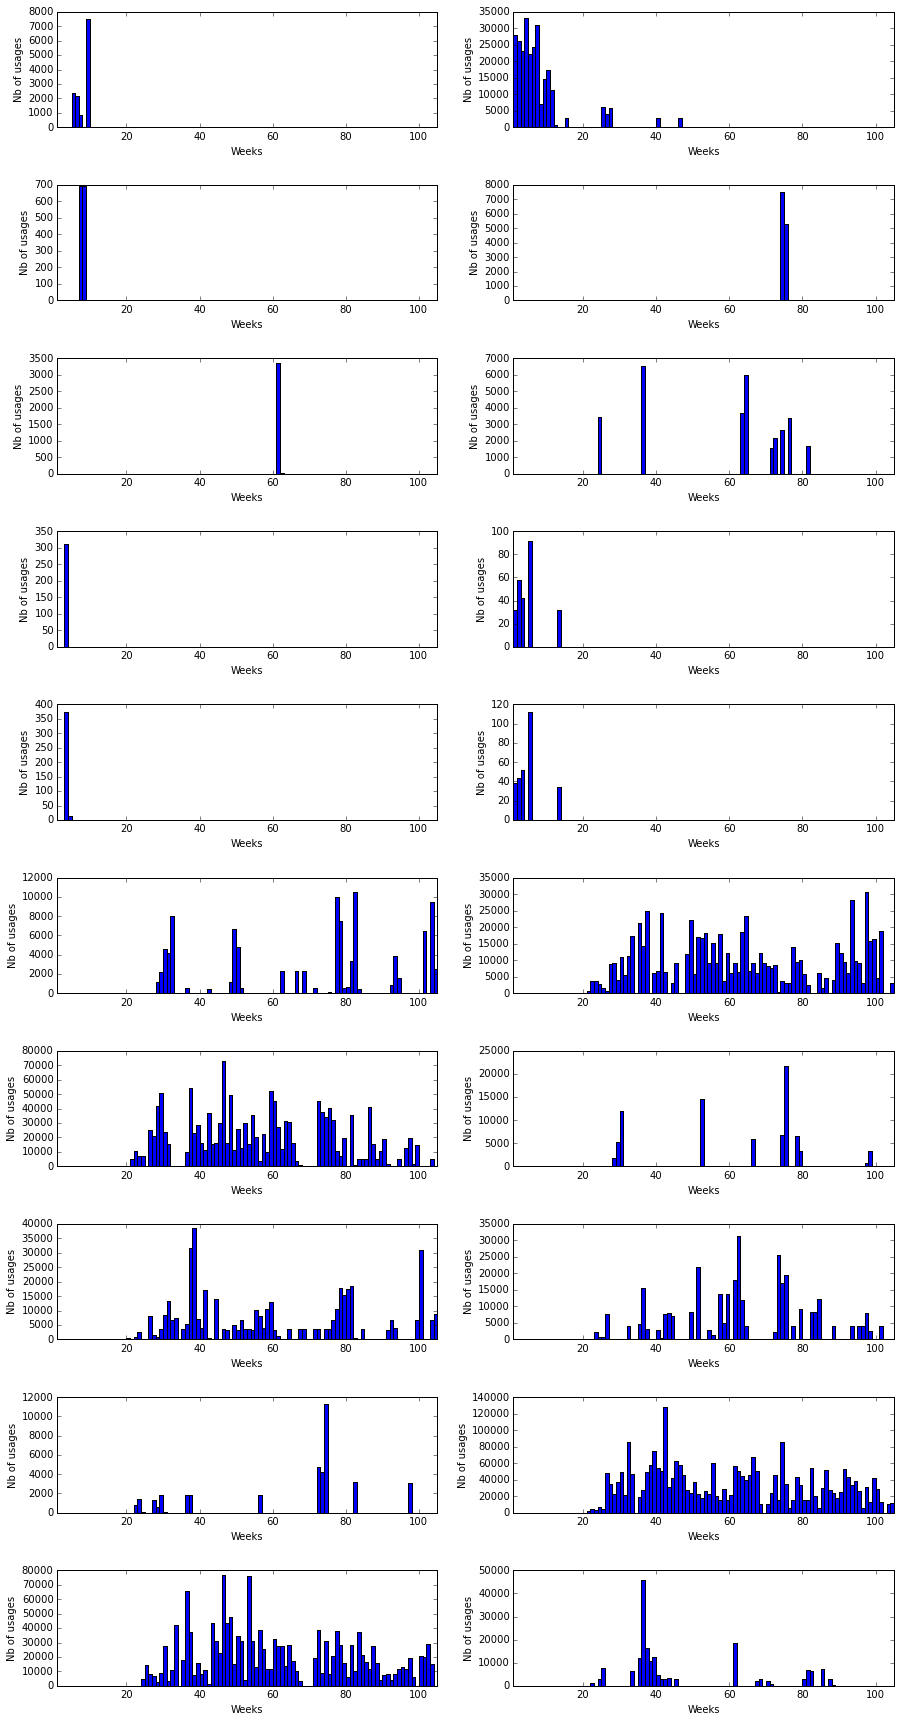

In [39]:
periods = [str(i) for i in range(1,105)]

plt.figure(figsize=(15,30))
plt.subplots_adjust( hspace=.5)
for i in range(48,68):#менять тут
    one_time_serie = data_full_1_104[periods].irow(i).values
    plt.subplot(10,2,i-47)#и тут
    plt.bar(range(1,105), one_time_serie, width=1, bottom=0)
    plt.xlim(1,105)
    plt.xlabel('Weeks')
    plt.ylabel('Nb of usages')
plt.show()

#Baselines

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Открываем первй файл задачи

In [2]:
data1_53 = pd.read_csv('data1_53.csv')
data1_53.irow(range(0,3))

,Unnamed: 0,ID,1,2,3,4,5,6,7,8,...,44,45,46,47,48,49,50,51,52,label
0,0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,0,376,0,0,0,198,134,0,67,1
1,1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Делим данные на обучение/тестирование

In [3]:
from sklearn.cross_validation import train_test_split
ind_train, ind_test, _, _ = train_test_split(data1_53.index, data1_53.index, test_size=0.33, random_state=42)

Подготовка данных для классификатора

In [7]:
X_train = data1_53[[str(i) for i in range(1,53)]].values[ind_train,:]
X_test = data1_53[[str(i) for i in range(1,53)]].values[ind_test,:]

y_train = data1_53['label'].values[ind_train]
y_test = data1_53['label'].values[ind_test]

Обучаем классификатор

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=2500, max_depth=6, subsample=0.8)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2, n_estimators=2500,
              random_state=None, subsample=0.8, verbose=0,
              warm_start=False)

Строим ROC кривые для обучения и теста

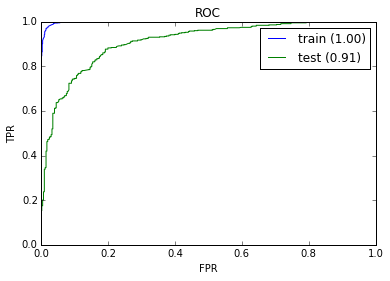

In [32]:
from sklearn.metrics import roc_curve, auc

fpr_train, tpr_train, _ = roc_curve(y_train, gbc.predict_proba(X_train)[:,1])
roc_auc_train = auc(fpr_train, tpr_train)
plt.plot(fpr_train, tpr_train, label='train (%.2f)' % roc_auc_train)

fpr_test, tpr_test, _ = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, label='test (%.2f)' % roc_auc_test)

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.show()

Открываем второй файл данных

In [28]:
data2_54 = pd.read_csv('data2_54.csv')
data2_54.irow(range(0,3))

,Unnamed: 0,ID,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,label
0,0,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,376,0,0,0,198,134,0,67,0,1
1,1,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,/LHCb/Collision10/Beam3500GeV-VeloClosed-MagDo...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Подготовка данных

In [29]:
X_train2 = data2_54[[str(i) for i in range(2,54)]].values[ind_train,:]
X_test2 = data2_54[[str(i) for i in range(2,54)]].values[ind_test,:]

y_train2 = data2_54['label'].values[ind_train]
y_test2 = data2_54['label'].values[ind_test]

Используем обученный классификатор для прогноза и строим ROC кривые

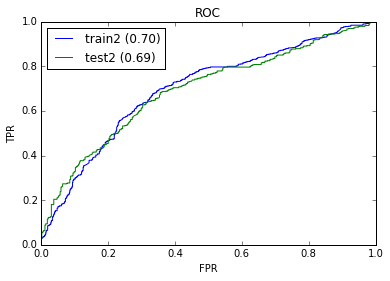

In [31]:
from sklearn.metrics import roc_curve, auc

fpr_train2, tpr_train2, _ = roc_curve(y_train2, gbc.predict_proba(X_train2)[:,1])
roc_auc_train2 = auc(fpr_train2, tpr_train2)
plt.plot(fpr_train2, tpr_train2, label='train2 (%.2f)' % roc_auc_train2)

fpr_test2, tpr_test2, _ = roc_curve(y_test2, gbc.predict_proba(X_test2)[:,1])
roc_auc_test2 = auc(fpr_test2, tpr_test2)
plt.plot(fpr_test2, tpr_test2, label='test2 (%.2f)' % roc_auc_test2)

plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.show()

ROC кривые на двух тестовых выборках и есть baselines задачи.

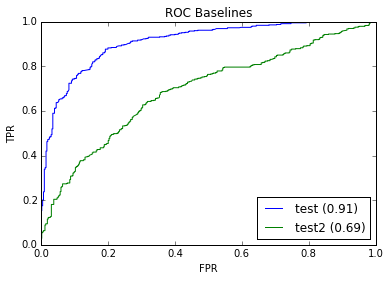

In [34]:
from sklearn.metrics import roc_curve, auc

fpr_test, tpr_test, _ = roc_curve(y_test, gbc.predict_proba(X_test)[:,1])
roc_auc_test = auc(fpr_test, tpr_test)
plt.plot(fpr_test, tpr_test, label='test (%.2f)' % roc_auc_test)

fpr_test2, tpr_test2, _ = roc_curve(y_test2, gbc.predict_proba(X_test2)[:,1])
roc_auc_test2 = auc(fpr_test2, tpr_test2)
plt.plot(fpr_test2, tpr_test2, label='test2 (%.2f)' % roc_auc_test2)

plt.title('ROC Baselines')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')
plt.show()

#Задача

1. Поставить ipython
2. Почитать про Restricted Boltzmann Machines (RBM) и Deep Belief Networks (DBN).
3. Выбрать и разобрать библиотеку с DBN (scikit-learn, nolearn, theanet(!?), pybrain(?)).
4. Используя DBN увеличить ROC AUC для test2.
5. Используя DBN увеличить ROC AUC для test и test2.